<a href="https://colab.research.google.com/github/MahendraTeja95/Fashion_MNIST_Data_classification/blob/main/Fashion_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Data Classification Project



# Step 1) Importing Libraries


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

# Step 2) Loading Data


In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape,y_train.shape, "***************",X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels =[	"T-shirt/top",	"Trouser",	"Pullover",	"Dress",	"Coat",	"Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Displaying image

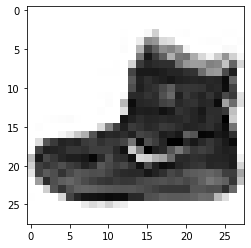

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

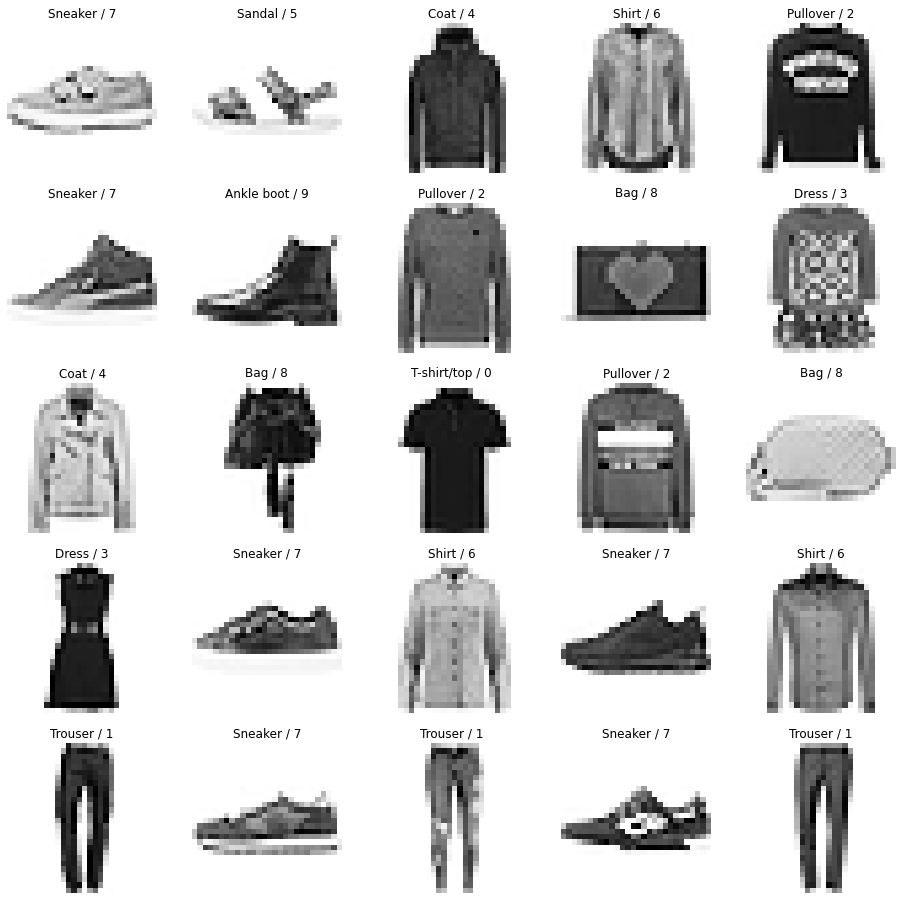

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j=j+1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test = np.expand_dims(X_test,-1)

In [ ]:
# feature scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation = train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

Step 3) Building the CNN Model


In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 15s 150ms/step - loss: 0.6042 - accuracy: 0.7950 - val_loss: 0.4065 - val_accuracy: 0.8606
Epoch 2/10
94/94 [==============================] - 15s 157ms/step - loss: 0.3683 - accuracy: 0.8708 - val_loss: 0.3649 - val_accuracy: 0.8728
Epoch 3/10
94/94 [==============================] - 14s 149ms/step - loss: 0.3246 - accuracy: 0.8875 - val_loss: 0.3302 - val_accuracy: 0.8858
Epoch 4/10
94/94 [==============================] - 14s 147ms/step - loss: 0.2948 - accuracy: 0.8966 - val_loss: 0.3131 - val_accuracy: 0.8891
Epoch 5/10
94/94 [==============================] - 15s 159ms/step - loss: 0.2732 - accuracy: 0.9024 - val_loss: 0.2974 - val_accuracy: 0.8964
Epoch 6/10
94/94 [==============================] - 14s 151ms/step - loss: 0.2557 - accuracy: 0.9089 - val_loss: 0.2863 - val_accuracy: 0.8994
Epoch 7/10
94/94 [==============================] - 16s 170ms/step - loss: 0.2413 - accuracy: 0.9139 - val_loss: 0.2867 - val_accuracy: 0.9009

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 8ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.03, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2726 - accuracy: 0.9009


[0.27262023091316223, 0.9009000062942505]

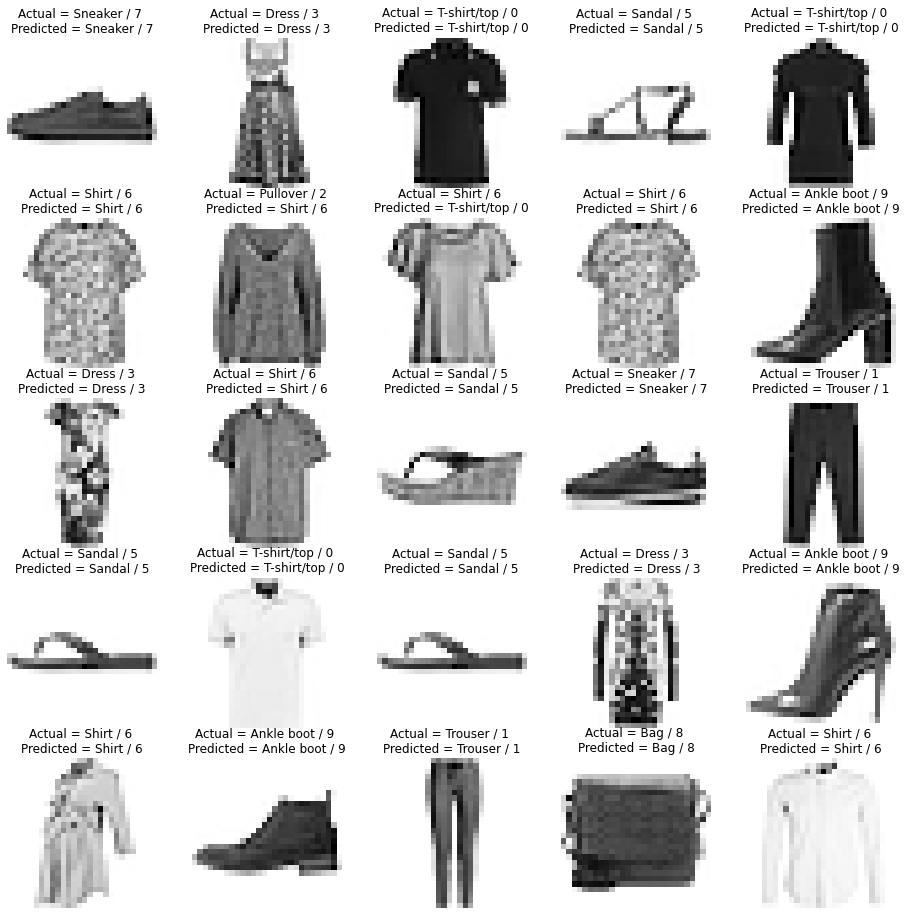

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j=j+1
  plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


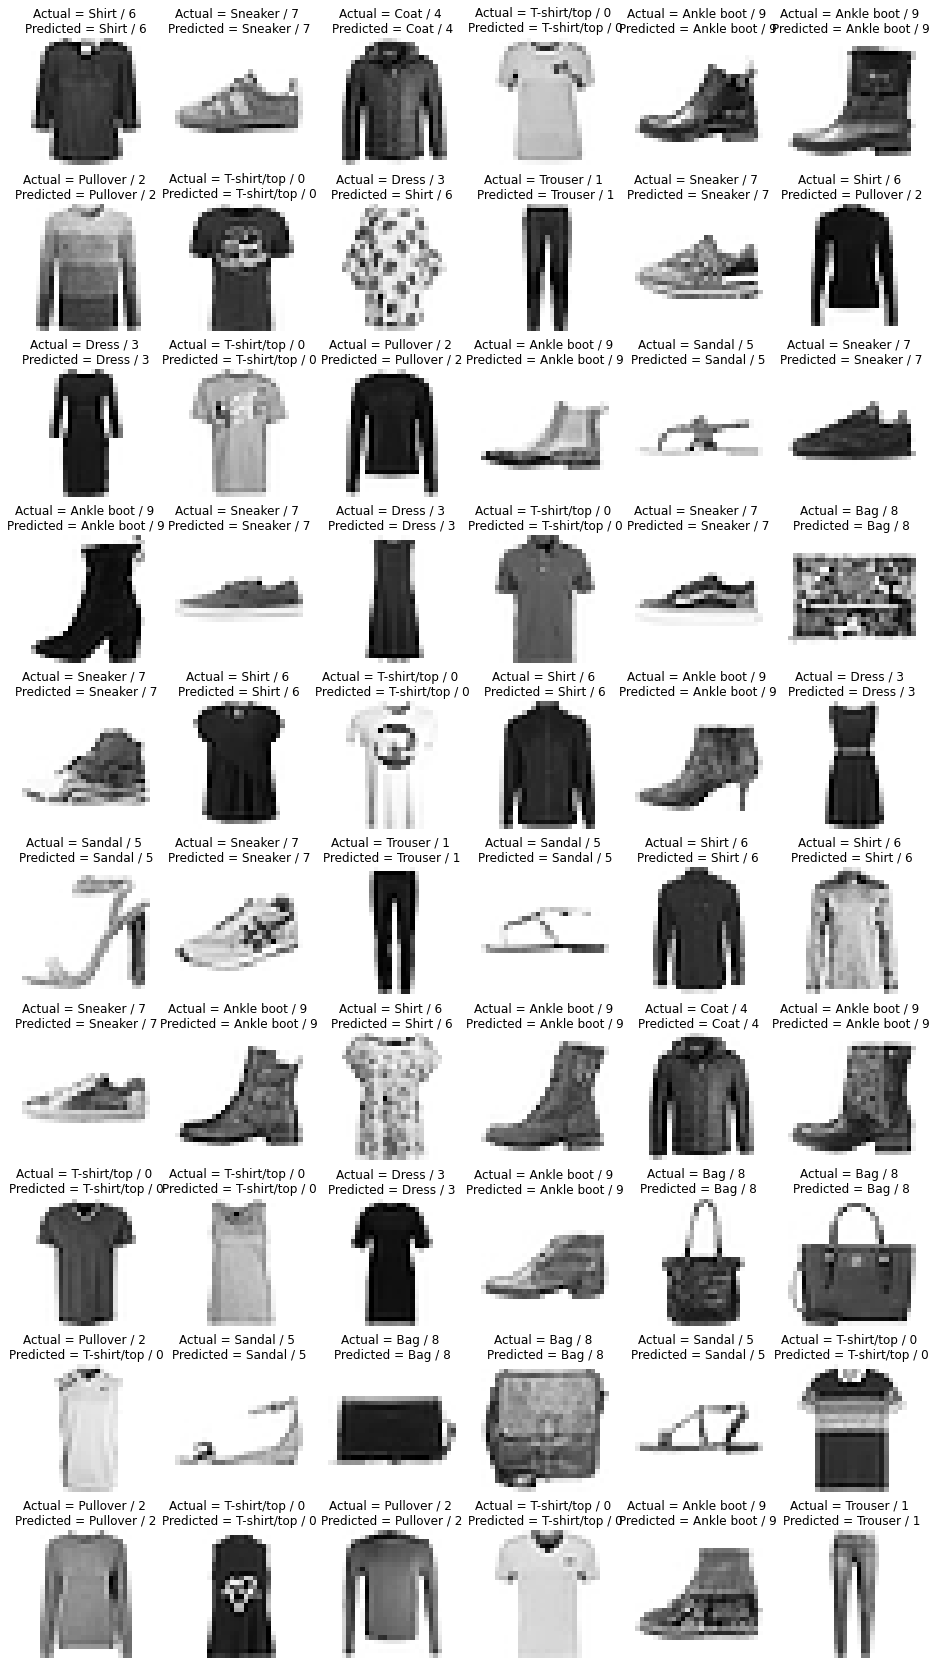

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j=j+1
  plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.97      0.98      0.98      1000
    Pullover       0.85      0.85      0.85      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.82      0.88      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.73      0.71      0.72      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



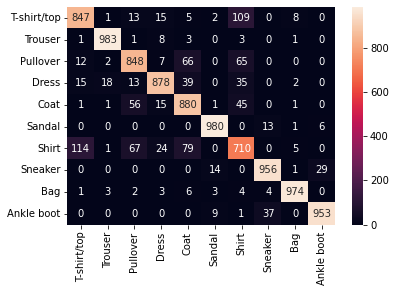

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
#Save Model

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

Build 2 Complex CNN

In [ ]:
#Building CNN model

In [ ]:
model2=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])


In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 19s 190ms/step - loss: 1.0354 - accuracy: 0.6271 - val_loss: 0.5648 - val_accuracy: 0.7828
Epoch 2/10
94/94 [==============================] - 18s 188ms/step - loss: 0.5460 - accuracy: 0.7952 - val_loss: 0.4617 - val_accuracy: 0.8286
Epoch 3/10
94/94 [==============================] - 17s 185ms/step - loss: 0.4511 - accuracy: 0.8363 - val_loss: 0.4011 - val_accuracy: 0.8479
Epoch 4/10
94/94 [==============================] - 18s 187ms/step - loss: 0.3983 - accuracy: 0.8534 - val_loss: 0.3719 - val_accuracy: 0.8605
Epoch 5/10
94/94 [==============================] - 17s 183ms/step - loss: 0.3582 - accuracy: 0.8698 - val_loss: 0.3476 - val_accuracy: 0.8717
Epoch 6/10
94/94 [==============================] - 18s 191ms/step - loss: 0.3419 - accuracy: 0.8748 - val_loss: 0.3237 - val_accuracy: 0.8785
Epoch 7/10
94/94 [==============================] - 17s 183ms/step - loss: 0.3184 - accuracy: 0.8818 - val_loss: 0.3242 - val_accuracy: 0.8813

In [ ]:
model2.save('fashion_mnist_cnn_model2.h5')

In [ ]:
#Building 3 cnn model

In [ ]:
model3=keras.models.Sequential([
                         keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model3.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 43s 443ms/step - loss: 1.1732 - accuracy: 0.5370 - val_loss: 0.6067 - val_accuracy: 0.7716
Epoch 2/10
94/94 [==============================] - 43s 453ms/step - loss: 0.5843 - accuracy: 0.7804 - val_loss: 0.4725 - val_accuracy: 0.8242
Epoch 3/10
94/94 [==============================] - 43s 459ms/step - loss: 0.4818 - accuracy: 0.8241 - val_loss: 0.3955 - val_accuracy: 0.8529
Epoch 4/10
94/94 [==============================] - 42s 452ms/step - loss: 0.4009 - accuracy: 0.8569 - val_loss: 0.3611 - val_accuracy: 0.8662
Epoch 5/10
94/94 [==============================] - 42s 444ms/step - loss: 0.3550 - accuracy: 0.8753 - val_loss: 0.3215 - val_accuracy: 0.8827
Epoch 6/10
94/94 [==============================] - 41s 435ms/step - loss: 0.3326 - accuracy: 0.8819 - val_loss: 0.3130 - val_accuracy: 0.8870
Epoch 7/10
94/94 [==============================] - 41s 439ms/step - loss: 0.3033 - accuracy: 0.8925 - val_loss: 0.3192 - val_accuracy: 0.8880

In [59]:
model3.save('fashion_mnist_cnn-model.h5')

In [60]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.2970 - accuracy: 0.8941


[0.29695817828178406, 0.89410001039505]